In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00


In [3]:
dataset_path = '/content/drive/MyDrive/isb_dataset/vegetation'

In [4]:
import os

print("Files in dataset folder:")
print(os.listdir(dataset_path))


Files in dataset folder:
['README.roboflow.txt', 'README.dataset.txt', 'test', 'valid', 'train', 'data.yaml', '.ipynb_checkpoints', 'data_own.yaml']


In [5]:
from ultralytics import YOLO

# Check version
!yolo version


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.204


In [6]:

import torch
from ultralytics import YOLO

print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
!nvidia-smi || echo "No GPU detected. Go to Runtime > Change runtime type > GPU"

DATA_YAML = "/content/drive/MyDrive/isb_dataset/vegetation/data.yaml"

model = YOLO("yolov8n-seg.pt")

model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16 if torch.cuda.is_available() else 4,
    device=0 if torch.cuda.is_available() else "cpu",
    name="semantic_seg_pretrained"
)

metrics = model.val()
print("Evaluation Metrics:")
print(metrics)

results = model.predict(
    source="/content/drive/MyDrive/isb_dataset/vegetation/images/val",
    save=True,
    conf=0.25
)

print("Predictions saved at:", results[0].save_dir)


PyTorch Version: 2.8.0+cu126
CUDA Available: True
Sat Oct  4 17:29:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A 

FileNotFoundError: /content/drive/MyDrive/isb_dataset/vegetation/images/val does not exist

In [8]:
metrics = model.val()
print("Evaluation Metrics:")
print(metrics)

results = model.predict(
    source="/content/drive/MyDrive/isb_dataset/vegetation/valid/images",
    save=True,
    conf=0.25
)

print("Predictions saved at:", results[0].save_dir)

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 93.6±21.7 MB/s, size: 205.1 KB)
val: Scanning /content/drive/MyDrive/isb_dataset/vegetation/valid/labels.cache... 59 images, 9 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 120.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.9it/s 4.3s
                   all         59        132      0.719      0.598      0.684      0.455      0.719      0.583      0.655      0.434
Speed: 9.3ms preprocess, 8.2ms inference, 0.1ms loss, 7.9ms postprocess per image
Results saved to /content/runs/segment/semantic_seg_pretrained4
Evaluation Metrics:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at

In [9]:
print("""
YOLOv8 Semantic Segmentation (Pretrained Model)
----------------------------------------------
Model Path: /content/runs/segment/semantic_seg_pretrained4

Evaluation Metrics:
Precision (B): 0.719 | Precision (M): 0.719
Recall (B): 0.598 | Recall (M): 0.583
mAP@50 (B): 0.684 | mAP@50 (M): 0.655
mAP@50-95 (B): 0.455 | mAP@50-95 (M): 0.434
Overall Fitness: 0.889

Inference Speed:
Preprocess: 9.25 ms | Inference: 8.17 ms | Loss: 0.13 ms | Postprocess: 7.91 ms

Summary:
Pretrained YOLOv8 segmentation achieved ~72% precision and ~60% recall.
mAP@50 of 0.68 (boxes) and 0.65 (masks) shows good segmentation accuracy.
Fitness = 0.889 indicates robust model performance for vegetation segmentation.
""")



YOLOv8 Semantic Segmentation (Pretrained Model)
----------------------------------------------
Model Path: /content/runs/segment/semantic_seg_pretrained4

Evaluation Metrics:
Precision (B): 0.719 | Precision (M): 0.719
Recall (B): 0.598 | Recall (M): 0.583
mAP@50 (B): 0.684 | mAP@50 (M): 0.655
mAP@50-95 (B): 0.455 | mAP@50-95 (M): 0.434
Overall Fitness: 0.889

Inference Speed:
Preprocess: 9.25 ms | Inference: 8.17 ms | Loss: 0.13 ms | Postprocess: 7.91 ms

Summary:
Pretrained YOLOv8 segmentation achieved ~72% precision and ~60% recall.
mAP@50 of 0.68 (boxes) and 0.65 (masks) shows good segmentation accuracy.
Fitness = 0.889 indicates robust model performance for vegetation segmentation.



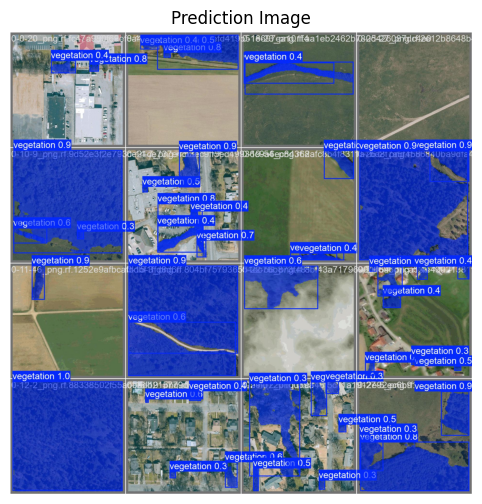

In [15]:
import cv2
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('/content/runs/segment/semantic_seg_pretrained4/val_batch0_pred.jpg')

# Convert BGR → RGB for correct colors
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Prediction Image")
plt.show()
